# C1- Preparing Data for Feature Engineering and Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HousingData.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [3]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [4]:
col_names = ['CrimeRate', 'ZoneRation', 'IndusRation',
             'AlongRiver', 'NO2Level', 'RoomsPerHouse',
              'OldHomwRatio', 'DisFromCenter', 'RoadAccessIndex',
              'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']

In [7]:
df.drop(['B', 'LSTAT'], axis = 1, inplace = True)

In [8]:
df.columns = col_names
df.sample(10)

,CrimeRate,ZoneRation,IndusRation,AlongRiver,NO2Level,RoomsPerHouse,OldHomwRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4,307,21.0,14.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,22.4
66,0.04379,80.0,3.37,0.0,0.398,5.787,31.1,6.6115,4,337,16.1,19.4
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6,432,17.8,22.8
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,19.1
413,28.65580,0.0,18.10,0.0,0.597,5.155,100.0,1.5894,24,666,20.2,16.3
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8,284,19.7,23.3
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6,391,19.2,19.7
136,0.32264,0.0,21.89,0.0,0.624,5.942,93.5,1.9669,4,437,21.2,17.4
95,0.12204,0.0,2.89,0.0,0.445,6.625,57.8,3.4952,2,276,18.0,28.4


In [9]:
df = df.replace('Na', np.nan)

In [10]:
df.isnull().sum().sort_values(ascending= False)

OldHomwRatio         20
AlongRiver           20
IndusRation          20
ZoneRation           20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTaxRate           0
RoadAccessIndex       0
DisFromCenter         0
RoomsPerHouse         0
NO2Level              0
dtype: int64

In [11]:
data = df.fillna(df.mean())

In [13]:
data.isnull().sum()

CrimeRate            0
ZoneRation           0
IndusRation          0
AlongRiver           0
NO2Level             0
RoomsPerHouse        0
OldHomwRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

In [14]:
data.shape

(506, 12)

In [15]:
target = data['MedianHomeValue']
features = data.drop('MedianHomeValue', axis = 1)

In [16]:
features.shape , target.shape

((506, 11), (506,))

In [17]:
from yellowbrick.target import FeatureCorrelation
feature_names = list(features.columns)

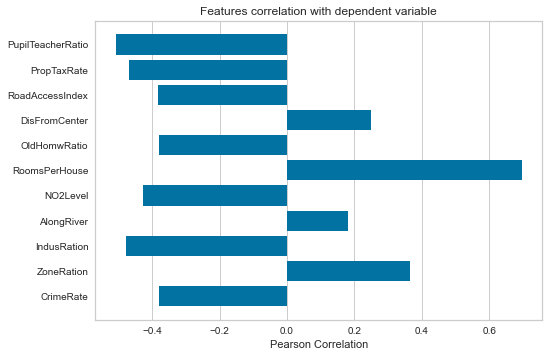

In [20]:
vis = FeatureCorrelation(laebel = feature_names)

vis.fit(features, target)

vis.poof();

# Applied of Filter Methods

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [22]:
select_univariate = SelectKBest(f_regression, k= 5).fit(features, target)

In [24]:
feature_mask = select_univariate.get_support()
feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [25]:
features.columns[feature_mask]

Index(['IndusRation', 'NO2Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [ ]:
# Q: select 4 Nigative feature and 1 positive

In [26]:
select_univariate.scores_

array([ 84.90107412,  77.9285999 , 149.79218706,  16.85363275,
       112.59148028, 471.84673988,  85.17727935,  33.57957033,
        85.91427767, 141.76135658, 175.10554288])

In [29]:
pd.DataFrame({'FeatureName': features.columns,
             'Score' : select_univariate.scores_}).sort_values(by='Score',ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRation,149.792187
9,PropTaxRate,141.761357
4,NO2Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomwRatio,85.177279
0,CrimeRate,84.901074
1,ZoneRation,77.928600
7,DisFromCenter,33.579570


In [30]:
uni_df = pd.DataFrame({'Univariate Method' : features.columns[feature_mask]})

In [31]:
uni_df

,Univariate Method
0,IndusRation
1,NO2Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


# Applied of Wrapper Methods

Selects features by **recursively** considering smaller subsets of features by **pruning** the least important feature at each step

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
linear_reg = LinearRegression()

In [34]:
rfe = RFE(estimator= linear_reg, n_features_to_select= 5, step = 1)

In [35]:
rfe.fit(features, target)

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [36]:
rfe_features = features.columns[rfe.support_]
rfe_features

Index(['AlongRiver', 'NO2Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

In [38]:
pd.DataFrame({'FeatureName': features.columns,
             'Rank' : rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
3,AlongRiver,1
4,NO2Level,1
5,RoomsPerHouse,1
7,DisFromCenter,1
10,PupilTeacherRatio,1
2,IndusRation,2
0,CrimeRate,3
8,RoadAccessIndex,4
6,OldHomwRatio,5
1,ZoneRation,6


In [39]:
rfe_df = pd.DataFrame({'RFE Method' : rfe_features})
rfe_df

,RFE Method
0,AlongRiver
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [40]:
# ML extensions 
! pip install mlxtend --upgrade

In [41]:
 ! pip install joblib --upgrade

  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0


## Forward and backward stepwise

add or remove one feature at a time based on the performance of the regression model,till we get to the specified number of features

In [42]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [43]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward= False, # Baskward selection
                                            scoring= 'neg_mean_squared_error',
                                            cv= 4)

In [44]:
feature_filtered = feature_selector.fit(features, target)

In [45]:
backward_features = list(feature_filtered.k_feature_names_)
backward_features

['ZoneRation',
 'NO2Level',
 'RoomsPerHouse',
 'DisFromCenter',
 'PupilTeacherRatio']

In [46]:
back_df = pd.DataFrame({'Backward Method' : backward_features})
back_df

,Backward Method
0,ZoneRation
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


In [47]:
feature_selector = SequentialFeatureSelector(LinearRegression(),
                                            k_features=5,
                                            forward= True, # Forward selection
                                            scoring= 'neg_mean_squared_error',
                                            cv= 4)

In [48]:
feature_filtered = feature_selector.fit(features, target)

In [49]:
forward_features = list(feature_filtered.k_feature_names_)
forward_features

['ZoneRation',
 'IndusRation',
 'RoomsPerHouse',
 'OldHomwRatio',
 'PupilTeacherRatio']

In [50]:
forward_df = pd.DataFrame({'Forward Method' : forward_features})
forward_df

,Forward Method
0,ZoneRation
1,IndusRation
2,RoomsPerHouse
3,OldHomwRatio
4,PupilTeacherRatio


# Applied of Embedded Methods

In [52]:
from sklearn.linear_model import Lasso

In [53]:
lasso = Lasso(alpha= 1.0)
lasso.fit(features, target)

Lasso()

In [54]:
lasso_coef = pd.DataFrame({'Feature' : features.columns,
                         'LassoCoef': lasso.coef_}).sort_values(by= 'LassoCoef',
                                                               ascending= False)
lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZoneRation,0.042629
3,AlongRiver,0.000000
4,NO2Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomwRatio,-0.046299
2,IndusRation,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [55]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by= 'LassoCoef', ascending= False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRation,0.087830
6,OldHomwRatio,0.046299
1,ZoneRation,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [57]:
lasso_df = lasso_coef.sort_values(by= 'LassoCoef', ascending= False).head(5)
lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [58]:
comp_selected_col_df = [uni_df, rfe_df, back_df, forward_df, lasso_df]

final_df = pd.concat(comp_selected_col_df, axis = 1)

In [59]:
final_df

,Univariate Method,RFE Method,Backward Method,Forward Method,Lasso Method
0,IndusRation,AlongRiver,ZoneRation,ZoneRation,RoomsPerHouse
1,NO2Level,NO2Level,NO2Level,IndusRation,PupilTeacherRatio
2,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,RoomsPerHouse,DisFromCenter
3,PropTaxRate,DisFromCenter,DisFromCenter,OldHomwRatio,RoadAccessIndex
4,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,PupilTeacherRatio,CrimeRate


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [64]:
result = []
def best_score(name, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    linear_model = LinearRegression(normalize=True).fit(X_train, y_train)
    
    print(name)
    print('Training score: ', linear_model.score(X_train, y_train))
    
    y_pred = linear_model.predict(X_test)
    print('r2_score: ', r2_score(y_test, y_pred))

In [65]:
best_score('Univariate', features[final_df['Univariate Method'].values], target)

Univariate
Training score:  0.5819205853861331
r2_score:  0.6918262966678661


C:\Users\JK\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [75]:
# Replace with pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

seed_value= 44
result = []
def best_score(name, X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    linear_model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
    linear_model.fit(X_train, y_train)
    print(name)
    print('Training score: ', linear_model.score(X_train, y_train))
    
    y_pred = linear_model.predict(X_test)
    print('r2_score: ', r2_score(y_test, y_pred))

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

In [79]:
best_score('Univariate', features[final_df['Univariate Method'].values], target)

Univariate
Training score:  0.5934789314803101
r2_score:  0.6474059682526541


In [86]:
best_score('Recursive', features[final_df['RFE Method'].values], target)

Recursive
Training score:  0.5885865687181149
r2_score:  0.7483485206789724


In [84]:
best_score('Backward', features[final_df['Backward Method'].values], target)

Backward
Training score:  0.6118689470256969
r2_score:  0.674767830186489


In [87]:
best_score('Forward', features[final_df['Forward Method'].values], target)

Forward
Training score:  0.5566151519235029
r2_score:  0.6973976825502237


In [88]:
best_score('Lasso', features[final_df['Lasso Method'].values], target)

Lasso
Training score:  0.6283611676150157
r2_score:  0.42402684914632405
